# Random Forest Classifier (basic version)

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../iris.csv")
dfSet = df[ df['variety'] == "Setosa" ]
dfVir = df[ df['variety'] == "Virginica"] 
dfVer = df[ df['variety'] == "Versicolor"]

In [3]:
features = ['sepal.length',
            'sepal.width']
labels   = 'variety'

In [4]:
x = df[features]
y = df[labels]

In [5]:
dtree = RandomForestClassifier(n_estimators=50, max_depth=4, max_leaf_nodes=10)
dtree = dtree.fit(x, y)

In [6]:
p = np.linspace(4.1, 8.2, 1000)
q = np.linspace(1.9, 4.6, 500)
pq = np.zeros((500000, 2))
for i in range(len(q)):
    for j in range(len(p)):
        pq[j + i*len(p)] = [p[j], q[i]]

In [7]:
out = dtree.predict(pd.DataFrame(pq))

c:\Users\Martin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
d = {'Setosa' : 0,
     'Virginica' : 1,
     'Versicolor' : 2}

a = np.reshape(pd.Series(out).map(d), (500,1000))

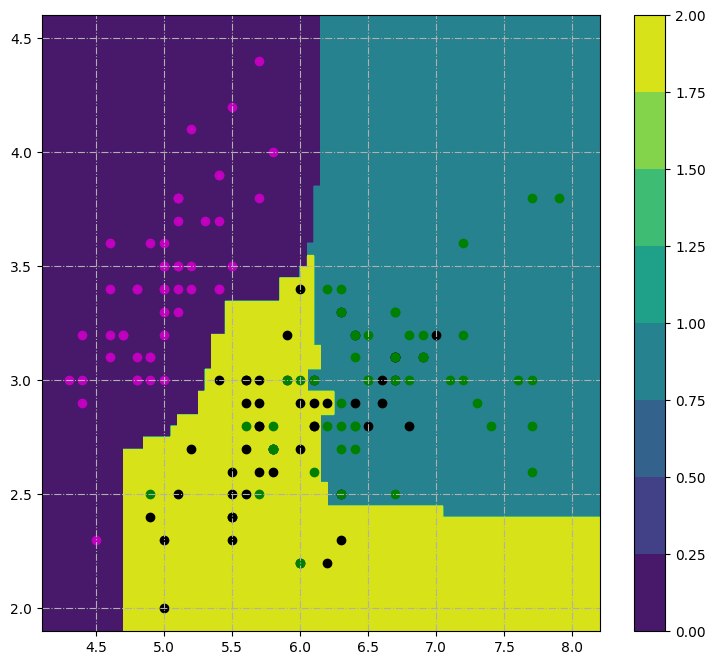

In [9]:
P, Q = np.meshgrid(p,q)

plt.figure(figsize=(9,8))
plt.grid(which='both', linestyle='dashdot')

plt.contourf(P, Q, a)
plt.colorbar()

plt.scatter(dfSet['sepal.length'], dfSet['sepal.width'], c='m')
plt.scatter(dfVer['sepal.length'], dfVer['sepal.width'], c='k')
plt.scatter(dfVir['sepal.length'], dfVir['sepal.width'], c='g')

plt.show()